<img src="https://images.nationalgeographic.org/image/upload/t_edhub_resource_key_image/v1638882458/EducationHub/photos/titanic-sinking.jpg">

<a href='https://www.kaggle.com/c/titanic/data'>Data dosyasını burada bulabilirsiniz</a>

* Bu projede Titanic gemisinde hayatta kalanları tahmin edeceğiz. Data train ve test olarak ayrı, trainle modeli edip test datasıyla test edeceğiz, tahminleri kaggle değerlendirecek

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

*  Data Dict.

* PassengerId: Her bir yolcunun benzersiz kimliği.
* Survived: Yolcunun hayatta kalıp kalmadığını gösteren değer (0 = hayatta kalmamış, 1 = hayatta kalmış).
* Pclass: Yolcunun seyahat sınıfı (1 = 1. sınıf, 2 = 2. sınıf, 3 = 3. sınıf).
* Name: Yolcunun adı ve soyadı.
* Sex: Yolcunun cinsiyeti (female veya male).
* Age: Yolcunun yaşı.
* SibSp: Yolcunun gemideki kardeş/eş sayısı.
* Parch: Yolcunun gemideki ebeveyn/çocuk sayısı.
* Ticket: Yolcunun bilet numarası.
* Fare: Yolcunun bilet ücreti.
* Cabin: Yolcunun kabini.
* Embarked: Yolcunun bineceği liman (C = Cherbourg, Q = Queenstown, S = Southampton).

## Datayı İmport 

In [2]:
df1=pd.read_csv('ttrain.csv')

### EDA

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1.shape

(891, 12)

In [5]:
df2=pd.read_csv('ttest.csv')

In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df2.shape

(418, 11)

In [8]:
df=pd.concat([df1, df2],ignore_index=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(1309, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [16]:
df['Ticket'].nunique()

929

In [17]:
del df['Ticket']

In [18]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [19]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [20]:
df['Cabin'].value_counts()

NameError: name 'dfftdf' is not defined

In [21]:
df['Cabin'].nunique()

186

In [22]:
del df['Cabin']
#bunu da sildim çünkü zaten pclass da aynı işi görüyor

### DATA VISUALIZATION

<Axes: xlabel='Sex', ylabel='count'>

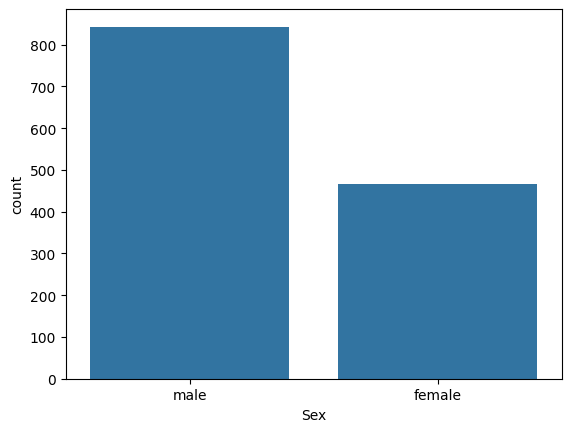

In [23]:
sns.countplot(x=df['Sex'])
#Erkek yolcu çoğunlukta

In [24]:
df['Age'].min(),df['Age'].max(),df['Age'].std(),df['Age'].var(),df['Age'].mean(),

(0.17, 80.0, 14.413493211271334, 207.74878655136482, 29.881137667304014)

In [25]:
df['Age']=df['Age'].fillna(df['Age'].mean())
#Agedeki boşluğu ortalamayla doldurdum,yaş verisinin dağılımı bozulmasın diye.

In [26]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

<Axes: xlabel='Embarked', ylabel='count'>

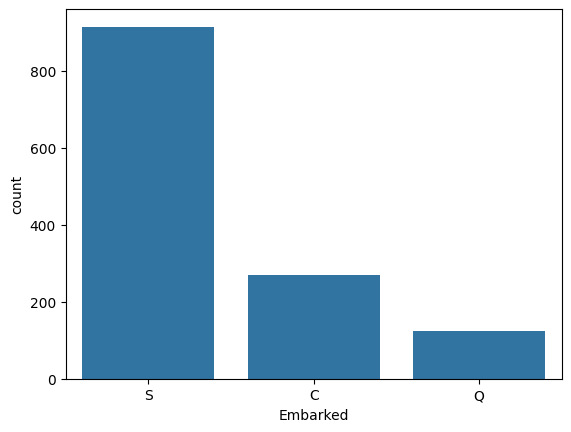

In [27]:
sns.countplot(x=df['Embarked'])
#Southampton dan binen yolcu çok

In [28]:
# Sonra en sık görülen değeri bulup, boş değerleri o değerle dolduryoruz
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

<Axes: xlabel='Pclass', ylabel='count'>

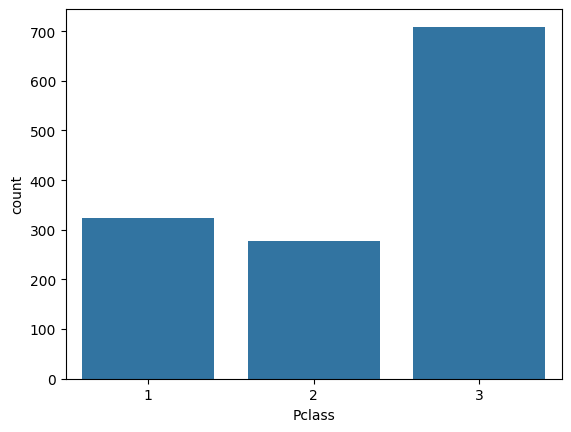

In [29]:
sns.countplot(x=df['Pclass'])
#3.sınıf yolcu çoğunlukta

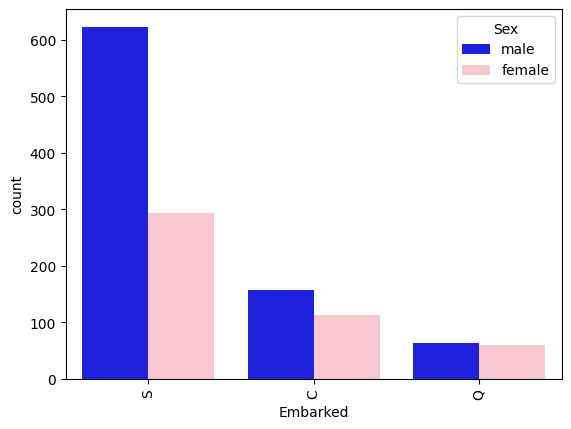

In [30]:
renkler = {'male': 'blue', 'female': 'pink'}
sns.countplot(x=df["Embarked"], hue=df["Sex"], palette=renkler)
plt.xticks(rotation=90);
#her limandan yola çıkanlar erkek çoğunlukta Queenstone den çıkanlar aynı neredeyse 

In [31]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [32]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=True)
#ilk boşluğu buldu noktaya kadar gidip arasındaki harfleri aldı

In [33]:
df['Name'].value_counts()

Name
Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: count, Length: 1307, dtype: int64

In [34]:
df['Name'].nunique()

1307

In [35]:
df['Title']=df['Title'].replace(['Ms','Mll'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Donna'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Major','Capt','Col'],'Mr')
#benzer sutunları birleştirdik

In [36]:
df['Name'].value_counts()

Name
Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: count, Length: 1307, dtype: int64

In [37]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Mlle', 'Dona'], dtype=object)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [39]:
del df['Name']
#artık name yi silebilirim

In [40]:
df['Family']=df['SibSp']+df['Parch']+1
#kardeş ve anne baba sayısını toplayıp 1 ekleyip ayrı bi sutuna atadık

In [41]:
del df['SibSp']

In [42]:
del df['Parch']

In [43]:
d={'male':0,'female':1}

In [44]:
df['Sex']=df['Sex'].map(d)

In [45]:
d={'Mr':0,'Mrs':1,'Miss':3,'Master':4,'Dr':5,'Mlle':6,'Dona':7}

In [46]:
df['Title']=df['Title'].map(d)

In [47]:
df['Sex']=df['Sex']**2
#bu sutunlar önemli olduğu için karesini aldık

In [48]:
df['Title']=df['Title']**2

In [49]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Title            0
Family           0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   Fare         1309 non-null   float64
 6   Embarked     1309 non-null   object 
 7   Title        1309 non-null   int64  
 8   Family       1309 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 92.2+ KB


In [51]:
df.shape

(1309, 9)

In [52]:
df=pd.get_dummies(df,drop_first=True)
#categoric değişkenleri dönüştürüyoruz

In [53]:
train=df[:891] #train iiçin ayırdık
test=df[891:] #test için ayırdık

In [54]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [55]:
    lr = LogisticRegression()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()

In [56]:
test1=test.drop(['Survived'], axis=1)#birleştirdiğimiz için survived boştu, sildik. 

In [57]:
test1

,PassengerId,Pclass,Sex,Age,Fare,Title,Family,Embarked_Q,Embarked_S
891,892,3,0,34.500000,7.8292,0,1,True,False
892,893,3,1,47.000000,7.0000,1,2,False,True
893,894,2,0,62.000000,9.6875,0,1,True,False
894,895,3,0,27.000000,8.6625,0,1,False,True
895,896,3,1,22.000000,12.2875,1,3,False,True
...,...,...,...,...,...,...,...,...,...
1304,1305,3,0,29.881138,8.0500,0,1,False,True
1305,1306,1,1,39.000000,108.9000,49,1,False,False
1306,1307,3,0,38.500000,7.2500,0,1,False,True
1307,1308,3,0,29.881138,8.0500,0,1,False,True


In [58]:
lr.fit(x,y)

LogisticRegression()

In [59]:
tahmin=lr.predict(test1)

In [60]:
tahmin

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [61]:
tahmin1=pd.DataFrame()

In [62]:
tahmin1['PassengerId']=df2['PassengerId']

In [63]:
tahmin1['Survived']=tahmin

In [64]:
tahmin1

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [65]:
tahmin1['Survived']=tahmin1['Survived'].astype('int32')
#survived i int çevirdik

In [66]:
#tahmini kayıt

In [67]:
tahmin1.to_csv('Titanic_tahmin1.csv',index=False)

In [68]:
rf.fit(x,y)

RandomForestClassifier()

In [69]:
tahmin2=lr.predict(test1)

In [70]:
tahmin2

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [71]:
sonuc2=pd.DataFrame()

In [72]:
sonuc2['PassengerId']=df2['PassengerId']
sonuc2['Survived']=tahmin2

In [73]:
sonuc2['Survived']=sonuc2['Survived'].astype('int32')

In [74]:
sonuc2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [75]:
sonuc2.to_csv('Titanic_tahmin2.csv',index=False)

In [76]:
gb.fit(x,y)

GradientBoostingClassifier()

In [77]:
tahmin3=gb.predict(test1)

In [78]:
sonuc3=pd.DataFrame()

In [79]:
sonuc3['PassengerId']=df2['PassengerId']

In [80]:
sonuc3['Survived']=tahmin3

In [81]:
sonuc3['Survived']=sonuc3['Survived'].astype('int32')

In [82]:
sonuc3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
sonuc3.to_csv('Titanic_tahmin3.csv',index=False)

(-0.5, 1426.5, 647.5, -0.5)

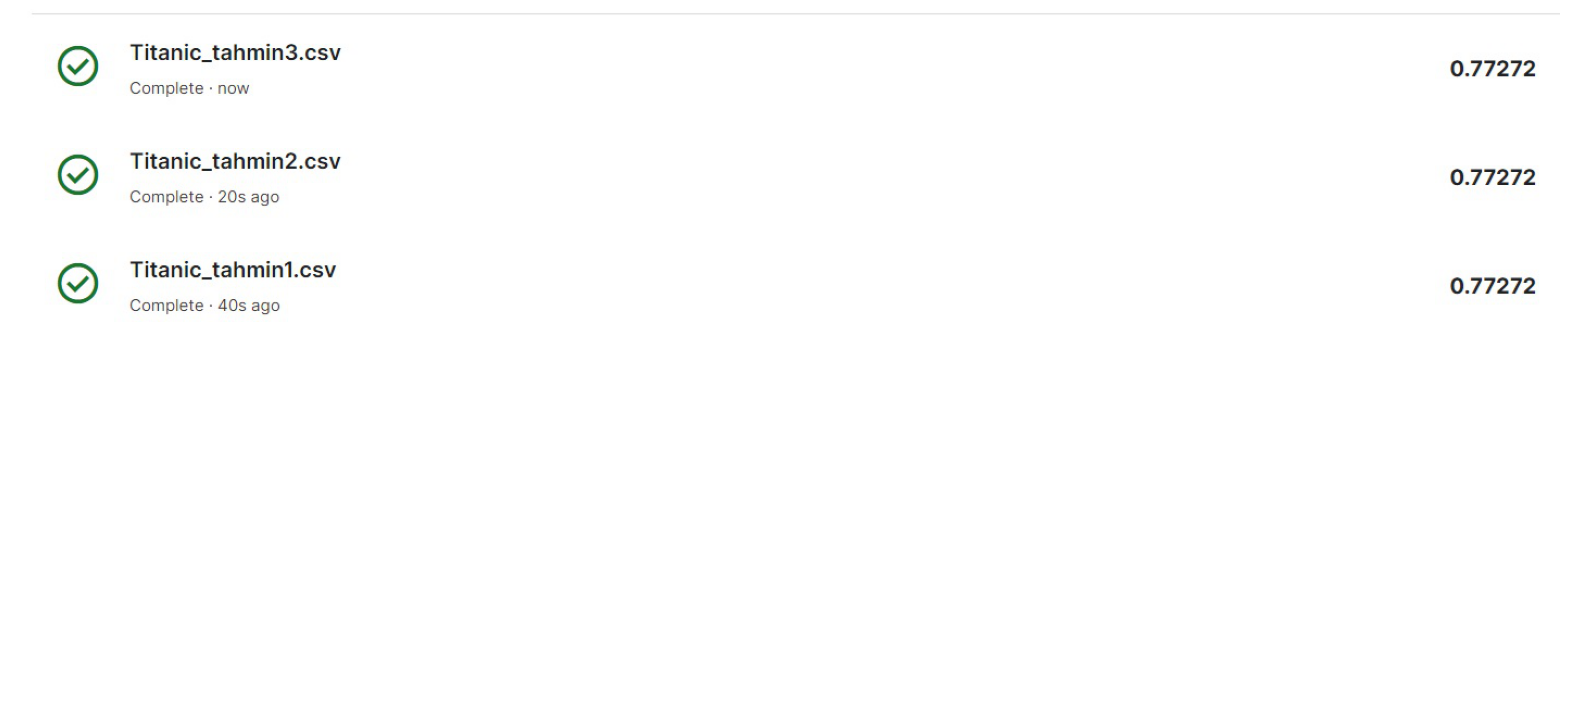

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20)) 
img = plt.imread('Adsız.jpg')
plt.imshow(img)
plt.axis('off')